In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.inspection import permutation_importance, plot_partial_dependence
!pip install shap
import shap
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.3 MB/s 


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('sample_data/master_dataset.csv')

In [4]:
print(df.shape)
print(df.columns.values)
df.head()

(7043, 52)
['Customer_ID' 'Gender' 'Age' 'Under_30' 'Senior_Citizen' 'Married'
 'Dependents' 'Number_of_Dependents' 'Referred_a_Friend'
 'Number_of_Referrals' 'Tenure_in_Months' 'Offer' 'Phone_Service'
 'Avg_Monthly_Long_Distance_Charges' 'Multiple_Lines' 'Internet_Service'
 'Internet_Type' 'Avg_Monthly_GB_Download' 'Online_Security'
 'Online_Backup' 'Device_Protection_Plan' 'Premium_Tech_Support'
 'Streaming_TV' 'Streaming_Movies' 'Streaming_Music' 'Unlimited_Data'
 'Contract' 'Paperless_Billing' 'Payment_Method' 'Monthly_Charge'
 'Total_Charges' 'Total_Refunds' 'Total_Extra_Data_Charges'
 'Total_Long_Distance_Charges' 'Total_Revenue' 'Satisfaction_Score'
 'Customer_Status' 'Churn_Label' 'Churn_Value' 'Churn_Score' 'CLTV'
 'Churn_Category' 'Churn_Reason' 'Location_ID' 'Country' 'State' 'City'
 'Zip_Code' 'Lat_Long' 'Latitude' 'Longitude' 'Population']


,Customer_ID,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Referred_a_Friend,Number_of_Referrals,...,Churn_Reason,Location_ID,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Population
0,8779-QRDMV,Male,78,No,Yes,No,No,0,No,0,...,Competitor offered more data,OXCZEW7397,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,68701
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,Yes,1,...,Competitor made better offer,FCCECI8494,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,55668
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,No,0,...,Competitor made better offer,HEHUQY7254,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715,47534
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,Yes,1,...,Limited range of services,WIUHRF2613,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639,27778
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,Yes,1,...,Extra data charges,CFEZBF4415,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188,26265


In [5]:
df.describe()

,Age,Number_of_Dependents,Number_of_Referrals,Tenure_in_Months,Avg_Monthly_Long_Distance_Charges,Avg_Monthly_GB_Download,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Satisfaction_Score,Churn_Value,Churn_Score,CLTV,Zip_Code,Latitude,Longitude,Population
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.265370,58.505040,4400.295755,93486.071134,36.197455,-119.756684,22139.814568
std,16.750352,0.962802,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,1856.768045,2.468929,2.154425,21152.174407
min,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,0.000000,5.000000,2003.000000,90001.000000,32.555828,-124.301372,11.000000
25%,32.000000,0.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,0.000000,40.000000,3469.000000,92101.000000,33.990646,-121.788090,2344.000000
50%,46.000000,0.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,0.000000,61.000000,4527.000000,93518.000000,36.205465,-119.595293,17554.000000
75%,60.000000,0.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,1.000000,75.500000,5380.500000,95329.000000,38.161321,-117.969795,36125.000000
max,80.000000,9.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,1.000000,96.000000,6500.000000,96150.000000,41.962127,-114.192901,105285.000000


In [6]:
df['gender_flag'] = df['Gender'].map({'Male': 0, 'Female':1}).fillna(-1)
df['married_flag'] = df['Married'].map({'No':0, 'Yes':1}).fillna(-1)
df['multiple_lines_flag'] = df['Multiple_Lines'].map({'No':0, 'Yes':1}).fillna(-1)
df['internet_flag'] = df['Internet_Service'].map({'No':0, 'Yes':1}).fillna(-1)
df['online_backup_flag'] = df['Online_Backup'].map({'No':0, 'Yes':1}).fillna(-1)
df['dev_protplan_flag'] = df['Device_Protection_Plan'].map({'No':0, 'Yes':1}).fillna(-1)
df['stream_tv_flag'] = df['Streaming_TV'].map({'No':0, 'Yes':1}).fillna(-1)
df['unlimited_data_flag'] = df['Unlimited_Data'].map({'No':0, 'Yes':1}).fillna(-1)
df['contract_flag'] = df['Contract'].map({'Month-to-Month':0,'One Year':1,'Two Year':2}).fillna(-1)
df['paperless_bill_flag'] = df['Paperless_Billing'].map({'No':0, 'Yes':1}).fillna(-1)
df['referred_minus_spouse'] = df['Number_of_Referrals'] - np.where(df['Married'] == 'Yes', 1, 0)
df['sum_positives'] = df['multiple_lines_flag'] + df['internet_flag'] + df['online_backup_flag'] + df['dev_protplan_flag'] + \
                      df['stream_tv_flag'] + df['unlimited_data_flag'] + df['contract_flag'] + df['paperless_bill_flag']

In [7]:
df['adults'] = df['Married'].map({'No':1, 'Yes':2}).fillna(-1)
df['hh_size'] = df['adults'] + df['Number_of_Dependents'] 
df['mc_hh_ratio'] = df['Monthly_Charge'] / df['hh_size'] 
df['amgbd_hh_ratio'] = df['Avg_Monthly_GB_Download'] / df['hh_size'] 
df['tldc_hh_ratio'] = df['Total_Long_Distance_Charges'] / df['hh_size'] 
df['tr_hh_ratio'] = df['Total_Revenue'] / df['hh_size'] 
df['tc_hh_ratio'] = df['Total_Charges'] / df['hh_size'] 
df['amldc_hh_ratio'] = df['Avg_Monthly_Long_Distance_Charges'] / df['hh_size'] 
df['tec_hh_ratio'] = df['Total_Extra_Data_Charges'] / df['hh_size']

In [8]:
df['tr_mc_ratio'] = df['Total_Revenue'] / df['Monthly_Charge']
df['tec_mc_ratio'] = df['Total_Extra_Data_Charges'] / df['Monthly_Charge']
df['tldc_amldc_ratio'] = df['Total_Long_Distance_Charges'] / df['Avg_Monthly_Long_Distance_Charges']
df['tc_amgbd_ratio'] = (df['Total_Charges'] / df['Avg_Monthly_GB_Download'])

In [13]:
df['tenure_cltv_ratio'] = df['Tenure_in_Months'] / df['CLTV']
df['tenure_age_ratio'] = df['Tenure_in_Months'] / df['Age']*12

In [14]:
df['phone_flag'] = df['Phone_Service'].map({'No':0, 'Yes':1}).fillna(-1)
df['online_security_flag'] = df['Online_Security'].map({'No':0, 'Yes':1}).fillna(-1)
df['prem_tech_flag'] = df['Premium_Tech_Support'].map({'No':0, 'Yes':1}).fillna(-1)
df['stream_movie_flag'] = df['Streaming_Movies'].map({'No':0, 'Yes':1}).fillna(-1)
df['stream_music_flag'] = df['Streaming_Music'].map({'No':0, 'Yes':1}).fillna(-1)
df['nbr_srvcs'] = df['phone_flag'] + df['internet_flag'] + df['multiple_lines_flag'] + df['unlimited_data_flag']
df['nbr_addon'] = df['online_security_flag'] + df['online_backup_flag'] + df['dev_protplan_flag'] + df['prem_tech_flag']
df['nbr_stream'] = df['stream_tv_flag'] + df['stream_movie_flag'] + df['stream_music_flag']
df['total_nbr_srvcs'] = df['nbr_srvcs'] + df['nbr_addon'] + df['nbr_stream']


In [15]:
df['internet_type_flag'] = df['Internet_Type'].map({'DSL':0, 'Cable':1, 'Fiber Optic':2}).fillna(-1)


In [16]:
df[['Age','Tenure_in_Months','tenure_age_ratio']]

,Age,Tenure_in_Months,tenure_age_ratio
0,78,1,0.153846
1,74,8,1.297297
2,71,18,3.042254
3,78,25,3.846154
4,80,37,5.550000
...,...,...,...
7038,30,72,28.800000
7039,38,24,7.578947
7040,30,72,28.800000
7041,32,11,4.125000


In [17]:
df = df.set_index('Customer_ID')
X = df[['contract_flag','mc_hh_ratio','Monthly_Charge','Number_of_Referrals','internet_type_flag','tenure_age_ratio','Age','hh_size']]
y = df['Churn_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [18]:

rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_train, rfc.predict(X_train)))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_train, rfc.predict_proba(X_train)[:,1]))
print(roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1]))

[[1452  100]
 [ 241  320]]
1452 100 241 320
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1552
           1       0.76      0.57      0.65       561

    accuracy                           0.84      2113
   macro avg       0.81      0.75      0.77      2113
weighted avg       0.83      0.84      0.83      2113

0.8387423935091278
0.8386180785612872
0.9021979805706548
0.8972322527886506


In [19]:
gbc = XGBClassifier(objective='binary:logistic', eval_metric='auc',
                    use_label_encoder=False, random_state=0, 
                    n_estimators=100, max_depth=3, learning_rate=0.05)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_predp = gbc.predict_proba(X_test)

print(confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print(tn, fp, fn, tp)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_train, gbc.predict(X_train)))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_train, gbc.predict_proba(X_train)[:,1]))
print(roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1]))

[[1442  110]
 [ 206  355]]
1442 110 206 355
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1552
           1       0.76      0.63      0.69       561

    accuracy                           0.85      2113
   macro avg       0.82      0.78      0.80      2113
weighted avg       0.85      0.85      0.85      2113

0.8448275862068966
0.8504495977283483
0.911030873172272
0.9073129720491759


In [20]:
ypredfull=gbc.predict(X)
ypredpfull=gbc.predict_proba(X)

print(confusion_matrix(y,ypredfull))
tn, fp, fn, tp = confusion_matrix(y,ypredfull).ravel()
print(tn, fp, fn, tp)
print(classification_report(y,ypredfull))
print(accuracy_score(y, gbc.predict(X)))
print(roc_auc_score(y, gbc.predict_proba(X)[:,1]))

[[4776  398]
 [ 683 1186]]
4776 398 683 1186
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      5174
           1       0.75      0.63      0.69      1869

    accuracy                           0.85      7043
   macro avg       0.81      0.78      0.79      7043
weighted avg       0.84      0.85      0.84      7043

0.8465142694874344
0.9099355794488763


In [21]:
ypredfull

array([1, 1, 1, ..., 0, 0, 0])

In [22]:
ypredptfull=ypredpfull[:,1]

In [23]:
ypredptfull

array([0.8489204 , 0.7539458 , 0.72333145, ..., 0.03125156, 0.13868278,
       0.11296871], dtype=float32)

In [24]:
df['ypredfull']=ypredfull

In [25]:
df['ypredptfull']=ypredptfull

In [ ]:
#from google.colab import files

#df.to_csv('master_dataset_scored.csv', encoding = 'utf-8-sig') 
#files.download('master_dataset_scored.csv')

In [26]:
def plot_fi(fi, X):
  importances = fi['importances_mean']
  imp_errors = fi['importances_std']
  scale = np.max(importances)
  y_pos = np.arange(X.columns.size)
  sortme = np.argsort(importances)
  plt.figure()
  plt.barh(y_pos, importances[sortme]/scale, alpha=0.3, xerr = imp_errors[sortme]/scale)
  plt.yticks(y_pos, X.columns[sortme])
  plt.xlabel('Feature importance')
  plt.show()

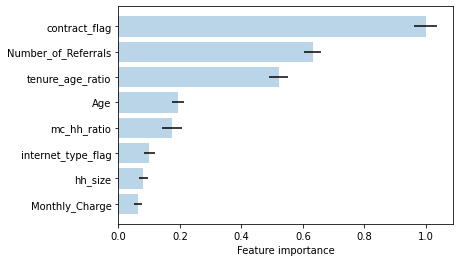

In [27]:
r = permutation_importance(gbc, X, y, n_repeats=10, random_state=0)
plot_fi(r, X)

In [28]:
importances=r['importances_mean']
importances

array([0.07422973, 0.01296323, 0.0046855 , 0.04694022, 0.00749681,
       0.0387051 , 0.01429788, 0.00603436])

In [29]:
scale = np.max(importances)
sortme = np.argsort(importances)
importances_raw=importances[sortme]
importances_raw

array([0.0046855 , 0.00603436, 0.00749681, 0.01296323, 0.01429788,
       0.0387051 , 0.04694022, 0.07422973])

In [30]:
importances_norm=importances[sortme]/scale
importances_norm

array([0.06312165, 0.08129304, 0.10099464, 0.17463657, 0.19261668,
       0.52142311, 0.63236419, 1.        ])

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


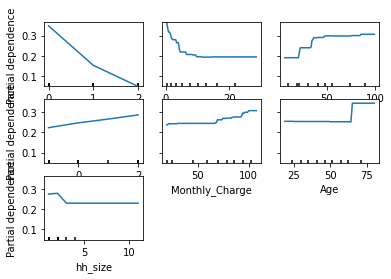

In [31]:
plot_partial_dependence(gbc, X, ['contract_flag','tenure_age_ratio','mc_hh_ratio','internet_type_flag','Monthly_Charge','Age','hh_size'])

In [32]:
cols = ['contract_flag','mc_hh_ratio','Monthly_Charge','Number_of_Referrals','internet_type_flag','tenure_age_ratio','Age','hh_size']
corr = df[cols].corr()
corr.style.background_gradient(cmap='coolwarm')

,contract_flag,mc_hh_ratio,Monthly_Charge,Number_of_Referrals,internet_type_flag,tenure_age_ratio,Age,hh_size
contract_flag,1.000000,-0.204051,-0.040841,0.290369,-0.226635,0.534790,0.027870,0.229573
mc_hh_ratio,-0.204051,1.000000,0.677934,-0.389291,0.660382,-0.089106,0.142640,-0.616484
Monthly_Charge,-0.040841,0.677934,1.000000,0.028173,0.875648,0.166945,0.144685,-0.064364
Number_of_Referrals,0.290369,-0.389291,0.028173,1.000000,-0.057338,0.278782,-0.025141,0.494967
internet_type_flag,-0.226635,0.660382,0.875648,-0.057338,1.000000,-0.015814,0.168688,-0.129563
tenure_age_ratio,0.534790,-0.089106,0.166945,0.278782,-0.015814,1.000000,-0.413838,0.235531
Age,0.027870,0.142640,0.144685,-0.025141,0.168688,-0.413838,1.000000,-0.095404
hh_size,0.229573,-0.616484,-0.064364,0.494967,-0.129563,0.235531,-0.095404,1.000000
